## LIBRARIES

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist, fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import  Sequential , layers

## IMPLEMENTAT-


In [33]:
(x_train, y_train),(x_test , y_test ) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_flat = x_train.reshape((-1, 28 * 28)) # Flatten to (samples, 784) ( -1 keeps the number of samples as it is )
x_test_flat = x_test.reshape((-1, 28 * 28))   # Flatten to (samples, 784)


    Autoencoder: An autoencoder is a type of neural network used for unsupervised learning of efficient data codings (i.e., dimensionality reduction). It aims to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal 'noise'.

    Encoder: The encoder part of the autoencoder takes the input data (e.g., your 28*28 pixel images) and compresses it into a lower-dimensional representation. This compressed representation is the latent space (or bottleneck layer).
    lat_space = 32: This means that your encoder will reduce the 28*28 = 784 features of each image down to just 32 features in the latent space. These 32 features are a compact and abstract representation of the original image.

    
    Decoder: The decoder then takes this 32-dimensional latent representation and tries to reconstruct the original 784-dimensional image.


In [34]:
lat_space = 32 # Define the latent space dimension

# define the autoencoder architecture

encoder = Sequential([
	layers.Dense(128 , activation = 'relu' , input_shape= (28*28, )),
	layers.Dense(64, activation = 'relu'),
	layers.Dense(lat_space, activation = 'relu')
	])

decoder = Sequential([
	layers.Dense(64, activation = 'relu' , input_shape = (lat_space , )),
	layers.Dense(128 , activation = 'relu'),
	layers.Dense(28*28 , activation = 'sigmoid')
	])


Autoencoder = Sequential([
	encoder ,
	decoder
	])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
Autoencoder.compile(optimizer = 'adam' ,loss ='mse')

In [36]:
Autoencoder.fit( # Keras uses a default batch_size of 32.
	x_train_flat , x_train_flat  ,
	epochs = 10 ,
	shuffle = True ,
	validation_data = (x_test_flat , x_test_flat ) )


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0498 - val_loss: 0.0177
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0171 - val_loss: 0.0138
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0135 - val_loss: 0.0117
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0083 - val_loss: 0.0081


## VISUALIZAT--

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


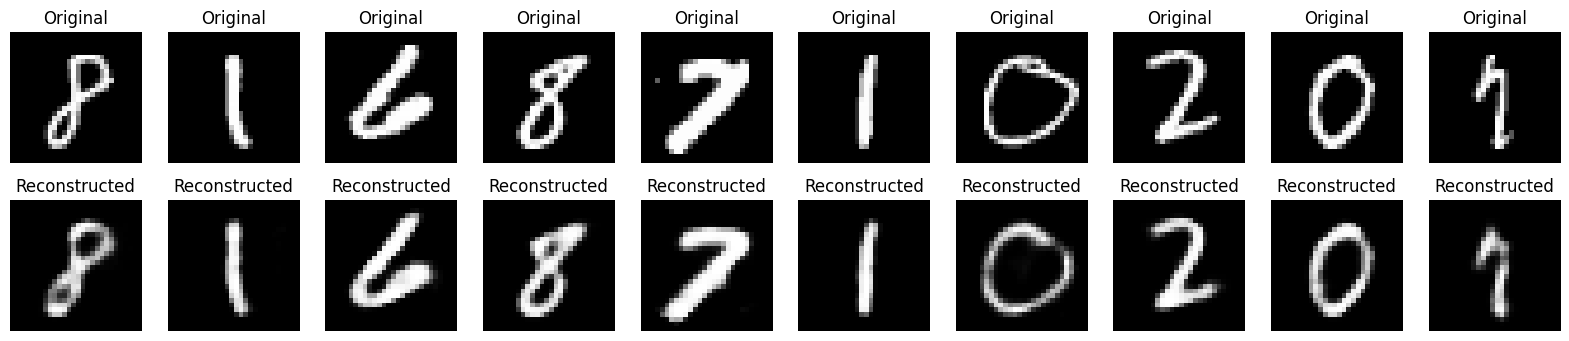

In [38]:
encoded_imgs = encoder.predict(x_test_flat) # takes the flattened test images and feeds em into the encoder , this will pass each img through the encoder's layers ( dense(128),dense(64),dense(lat_space))
decoded_imgs = decoder.predict(encoded_imgs) # attempts to reconstruct the original 784-pixel image from the 32-dimensional latent

idx = np.random.choice(len(x_test_flat), 10 , replace=False) # this latest means no duplicates !

plt.figure(figsize = (20,4))

for i , index in enumerate(idx):

  # Original
  ax = plt.subplot(2,10,i+1)
  plt.imshow(x_test[index], cmap="gray")
  plt.title("Original")
  plt.axis("off")

  # Reconstructed
  ax = plt.subplot(2,10,i +1 +10)
  recon = decoded_imgs[index].reshape(28,28)
  plt.imshow(recon, cmap="gray")
  plt.title("Reconstructed")
  plt.axis("off")

